<h1>Skill Demand Analysis</h1>


In [183]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import ast
import seaborn as sns
from datasets import load_dataset

In [184]:
# Loading the Dataset
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()  # type: ignore
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [185]:
# Cleaning the dataset
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])  # type: ignore
df["job_skills"] = df["job_skills"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x
)  # type: ignore

<h2>Analyzing the most required job skills for the top 3 data roles in Germany</h2>


In [186]:
# Restricting Data to jobs in Germany
df_ger = df[df["job_country"] == "Germany"]
# Exploding the job skills column
df_exploded = df_ger.explode(column="job_skills")
# Grouping the data by job skills and job title short
df_grouped = (
    df_exploded.groupby(["job_skills", "job_title_short"])
    .size()
    .to_frame(name="skill_count")
)
df_skills = df_grouped.reset_index()
# Creating a list of top 3 data roles from our analyzed dataframe
top_3_roles = list(df_ger["job_title_short"].value_counts()[:3].index)
# Creating a data set showing total number of jobs per role
job_numbers = df_ger["job_title_short"].value_counts().reset_index(name="job_total")
# merging the total number of jobs per role to the job skills dataframe
df_skills = pd.merge(df_skills, job_numbers, how="left", on="job_title_short")
df_skills.sort_values(by="skill_count", ascending=False, inplace=True)
# Calculating the percentage likelihood of a skill being a requirement in a job posting
df_skills["skill_percent"] = df_skills["skill_count"] / df_skills["job_total"] * 100

In [187]:
# Creating custom palette


c_list = ["#ec46ec", "#350335"]
cmap = sns.blend_palette(colors=c_list, n_colors=8, as_cmap=True)

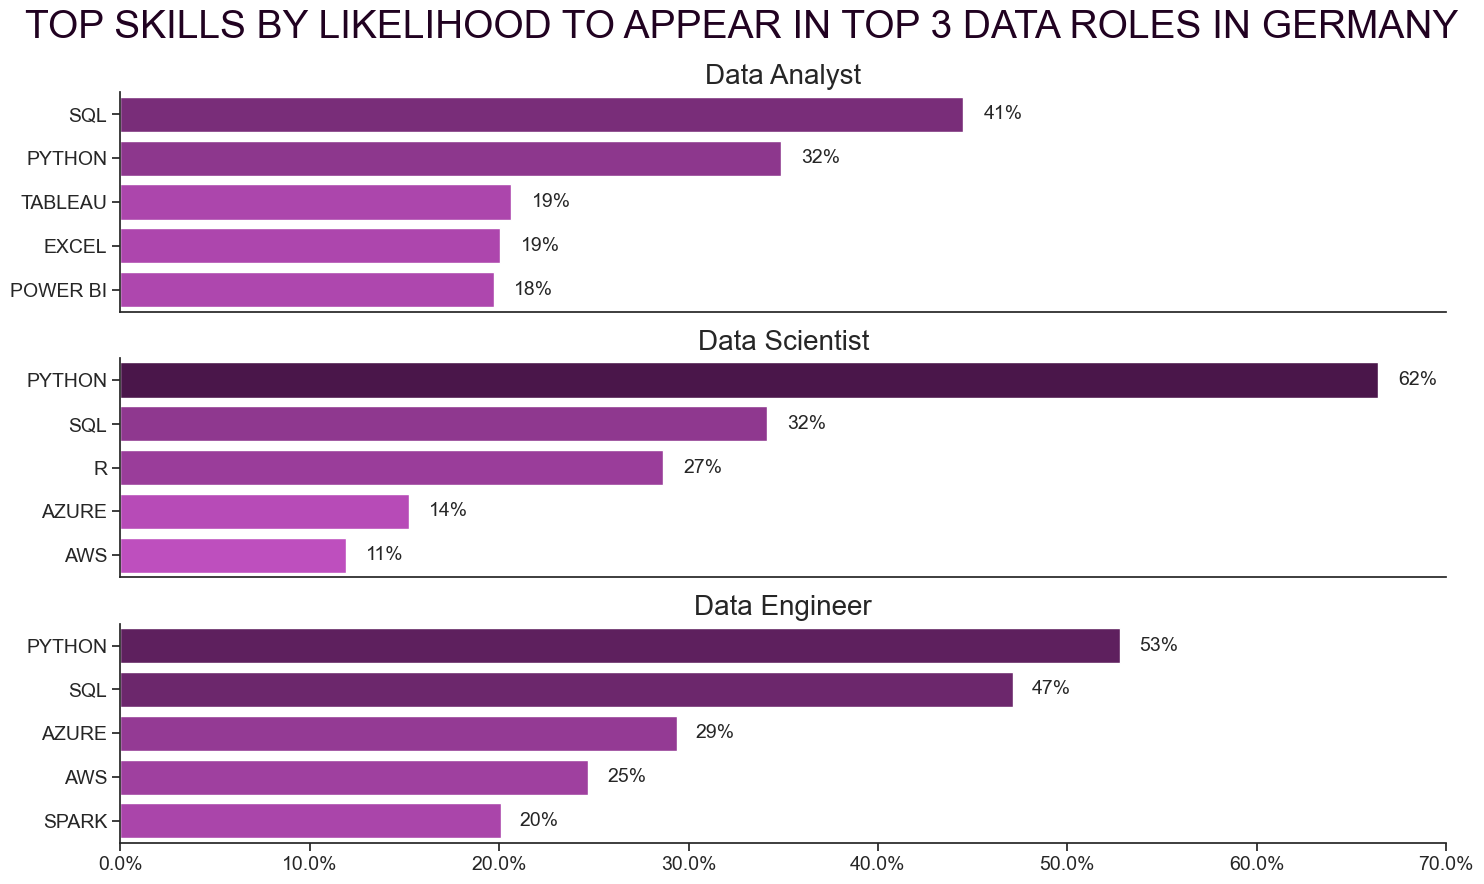

In [ ]:
# Plotting the Chart

fig, ax = plt.subplots(3, 1, figsize=(15, 9))
# Creating normalizer for hue
norm = mcolor.Normalize(
    vmin=df_skills["skill_percent"].min(), vmax=df_skills["skill_percent"].max()
)
sns.set_theme(style="ticks")
for i, val in enumerate(top_3_roles):
    plot_data = df_skills[df_skills["job_title_short"] == val].head()
    sns.barplot(
        data=plot_data,
        x="skill_percent",
        y=plot_data["job_skills"].str.upper(),
        hue="skill_percent",
        hue_norm=norm,
        palette=cmap,
        ax=ax[i],
        legend=False,
    )
    for x, v in enumerate(plot_data["skill_percent"]):
        ax[i].text(v + 1, x, f"{v:.0f}%", va="center", fontsize=14)
    ax[i].set_title(val, fontsize=20)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 65)
    ax[i].xaxis.set_visible(False)
    ax[i].tick_params(axis="y", labelsize=14)
    if i == len(top_3_roles) - 1:
        ax[i].xaxis.set_visible(True)
        ticks = ax[i].get_xticks()
        ax[i].set_xticks(ticks)
        ax[i].set_xticklabels(
            (f"{value}%" for value in ax[i].get_xticks()), fontsize=14
        )
    sns.despine(ax=ax[i])
fig.suptitle(
    ("Top skills by likelihood to appear in top 3 data roles in Germany").upper(),
    fontsize=28,
    color="#210221",
)
fig.tight_layout()
plt.show()